In [1]:
%pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2
import numpy as np
import mediapipe

In [4]:
gestures = {}

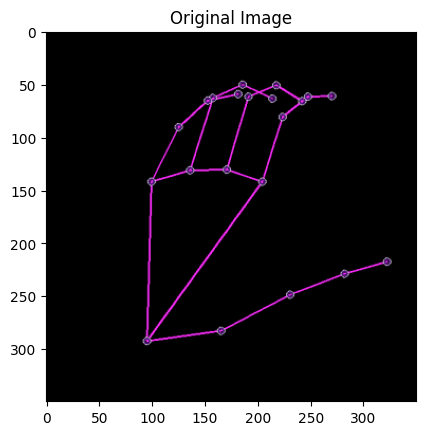

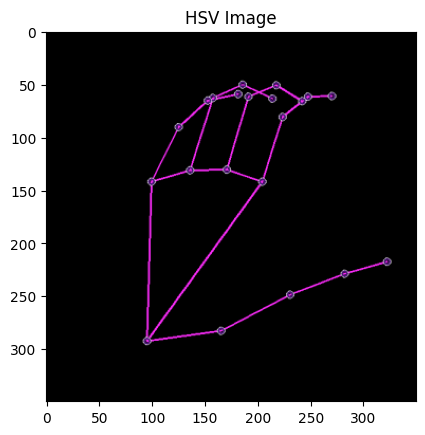

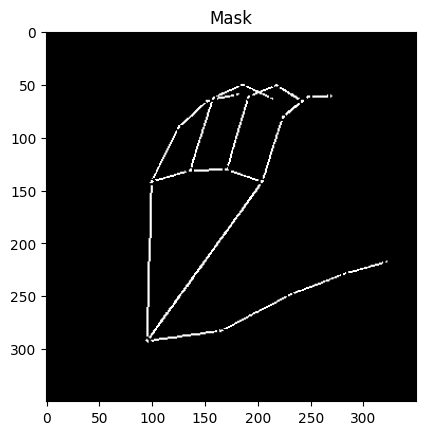

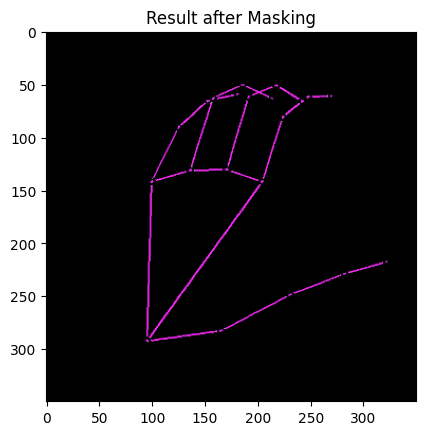

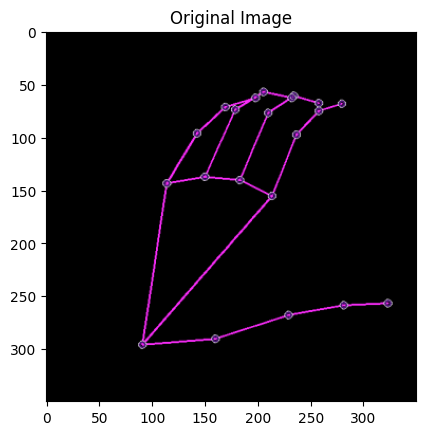

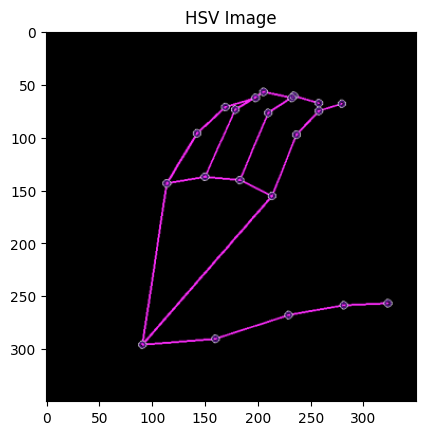

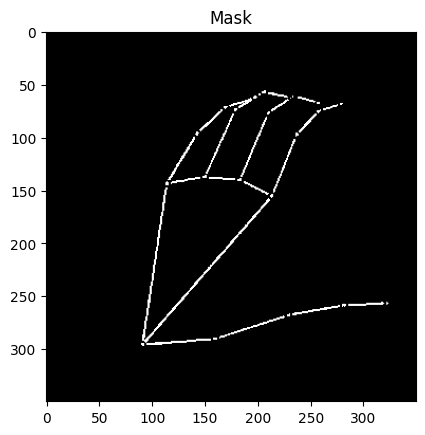

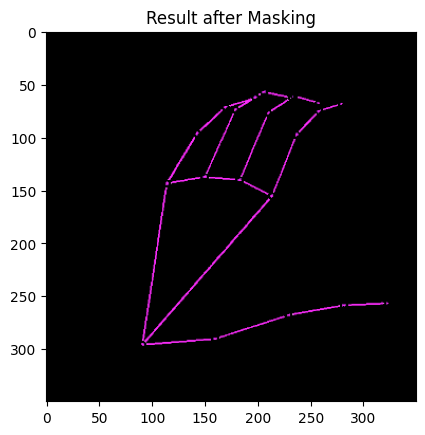

(443, 32)
The gestures are similar.


In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import json

def preprocess_image(image_path, show_steps=True):
    # Load image
    img = cv2.imread(image_path)
    if show_steps:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title("Original Image")
        plt.show()

    # Convert to HSV
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    if show_steps:
        plt.imshow(cv2.cvtColor(hsv_img, cv2.COLOR_HSV2RGB))
        plt.title("HSV Image")
        plt.show()

    # Define pink color range and create mask
    lower_pink = np.array([140, 100, 100])
    upper_pink = np.array([170, 255, 255])
    mask = cv2.inRange(hsv_img, lower_pink, upper_pink)
    if show_steps:
        plt.imshow(mask, cmap='gray')
        plt.title("Mask")
        plt.show()

    # Apply mask
    result = cv2.bitwise_and(img, img, mask=mask)
    if show_steps:
        plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
        plt.title("Result after Masking")
        plt.show()

    return result

def match_gestures(image1_path, image2_path, threshold=120, show_preprocess_steps=True):
    img1 = preprocess_image(image1_path, show_steps=show_preprocess_steps)
    img2 = preprocess_image(image2_path, show_steps=show_preprocess_steps)
    
    orb = cv2.ORB_create()
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)

    print(des2.shape)
    
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key=lambda x: x.distance)
    
    if len(matches) > threshold:
        print("The gestures are similar.")
    else:
        print("The gestures are not similar.")

    return des2

# Example usage (paths need to be valid image paths for actual execution)
image1_path = 'saved_imgs/cropped_hand_1.png'
image2_path = 'saved_imgs/bumper_base.png'
des2 = match_gestures(image1_path, image2_path, show_preprocess_steps=True)

gestures["bumper"] = des2.tolist()




In [10]:
for val in gestures:
    print(val, gestures[val])

bumper [[105, 6, 144, 69, 52, 14, 78, 48, 113, 138, 114, 68, 91, 32, 144, 212, 20, 76, 4, 44, 161, 240, 5, 14, 32, 254, 32, 128, 74, 164, 66, 5], [80, 48, 157, 100, 10, 82, 20, 40, 34, 162, 130, 9, 215, 54, 64, 115, 128, 213, 232, 162, 77, 67, 217, 0, 217, 227, 205, 51, 40, 96, 14, 18], [126, 34, 161, 100, 169, 89, 73, 128, 35, 180, 162, 168, 195, 38, 197, 190, 1, 213, 236, 144, 8, 66, 237, 0, 136, 240, 205, 183, 160, 112, 6, 36], [97, 34, 49, 96, 40, 13, 65, 8, 111, 188, 160, 72, 135, 4, 80, 52, 129, 144, 76, 9, 136, 34, 104, 16, 129, 208, 1, 60, 80, 8, 71, 36], [100, 162, 168, 65, 136, 13, 201, 152, 6, 188, 164, 204, 225, 65, 90, 2, 13, 68, 104, 12, 138, 96, 203, 17, 79, 137, 37, 124, 64, 136, 78, 32], [65, 48, 19, 72, 8, 65, 128, 72, 206, 96, 128, 8, 148, 150, 32, 100, 192, 20, 122, 1, 1, 67, 179, 64, 145, 0, 11, 58, 24, 0, 39, 36], [109, 176, 24, 32, 137, 93, 80, 9, 43, 113, 33, 29, 30, 19, 74, 152, 129, 4, 216, 20, 23, 96, 216, 17, 203, 209, 1, 119, 202, 4, 138, 18], [100, 66, 237

In [15]:
#write binary feature vectors to json
json_object = json.dumps(gestures)

# Write the JSON string to a file
with open("base_gestures_2.json", "w") as outfile:
    outfile.write(json_object)

In [48]:
#retrieve
with open("base_gestures.json", "r") as infile:
    data = json.load(infile)

# Access the 'speed' key to get the list of descriptors
des2_list = data["speed_inc"]

# Convert the list back into a NumPy array
des2_retrieved = np.array(des2_list)
print(des2_retrieved)

[[118  32 245 ... 112   5  36]
 [ 64  34  49 ... 128  87 161]
 [  0  32  68 ... 128  18 128]
 ...
 [ 64  32   2 ...   4   3 129]
 [104   4  64 ... 164  82   0]
 [ 98  14 109 ... 172  86  92]]
